# 1 柱状图

柱状图(bar chart)通过不同长度的柱子表示数据大小，每个柱子代表一个类别，长度或高度对应该类别的数值，可以是水平或垂直的

使用场景

- 比较不同类别的数据，比如不同产品销售额
- 展示分类数据的分布，不同年龄段的人口比例
- 展示时间序列数据的变化，每月销售额变化
- 展示部分与整体的关系，例如不同部门对公司整体利润的贡献


## 1.1 sns.barplot

参数

- data:DataFrame
- x:x轴变量名称
- y:y轴变量名称
- estimator:y值的聚合方法
    - mean：均值,默认
    - sum:和
    - median:中位数
    - max:最大
    - min:最小
- hue:字符串，指定颜色编码的列名，根据变量类别改变柱子颜色
- errorbar:
    - None:
    - ci:置信区间
    - sd:标准差
    - se:标准误

## 1.2 案例

tips：餐饮小费数据

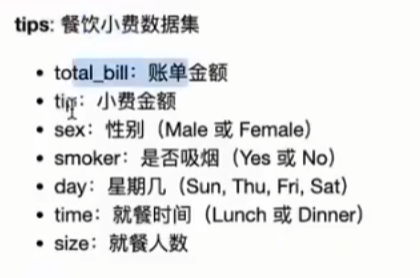



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 1.2.1 基本柱状图



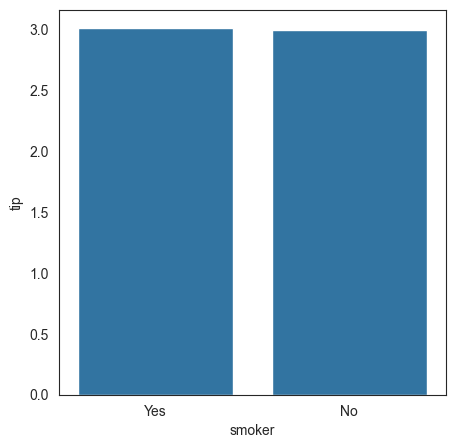

In [8]:
# 设置风格
sns.set_style("white")

# 设置图片大小
plt.figure(figsize=(5,5))

# 设置barplot,绘制不同性别的柱状图

sns.barplot(
    data=tips,
    x='smoker',
    y='tip',
    errorbar=None
)
# 设置标题和轴名

# 绘制
plt.show()

### 1.2.3 柱状图显示数值

ax.annotate(显示数值，（横位置，纵位置），ha,va,fontsize,fontweight)用于在指定位置添加注释或文本

- 首先对绘制的对象sns.barplot赋值为ax，
- ax.patches就是每一个柱子，对每个柱子进行遍历
- ax.annotate()参数
    - p.get_height()获取柱子高度,即显示的数值，此处是小费金额
    - p.get_x()获取柱子的左边界位置
    - p.get_width()获取柱子宽度
    - ha='center':水平对齐
        - center居中：
        - left靠左
        - right靠右
    - ha='center':水平对齐
        - center居中：
        - left靠左
        - right靠右
    - fontsize=12:文本字体大小
    - fontweight='bold'：加粗
        - normal正常
        - bold加粗
        - light变细
    - color=‘black’文本字体

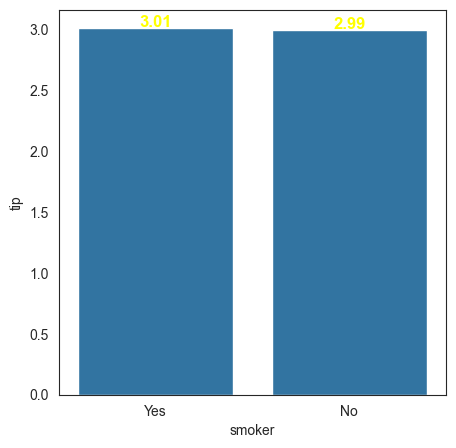

In [21]:
sns.set_style('white')

plt.figure(figsize=(5,5))

ax = sns.barplot(
    data=tips,
    x='smoker',
    y='tip',
    errorbar=None
)

# 添加数值

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width()/2.,p.get_height() + 0.05),
        ha='center',va='center',fontsize=12,fontweight='bold',color='yellow'
    )

#
plt.show()

### 1.2.3 estimator 用来聚合y值

sns.barplot添加estimator='median'参数

In [9]:
ax = sns.barplot(
    data=tips,
    x='smoker',
    y='tip',
    errorbar=None,
    estimator='median'
)

### 1.2.4 同位置多柱状图
sns.barplot添加hue参数


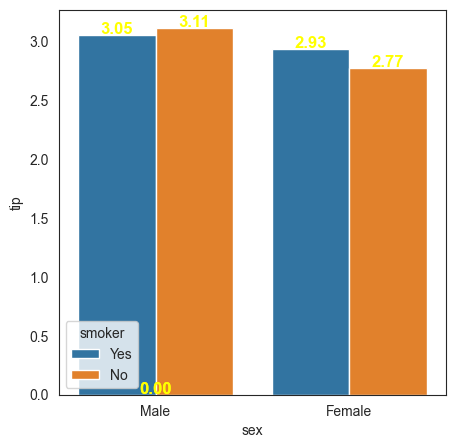

In [22]:
sns.set_style('white')

plt.figure(figsize=(5,5))

ax = sns.barplot(
    data=tips,
    x='sex',
    y='tip',
    errorbar=None,
    estimator='mean',
    hue='smoker'
)

# 添加数值

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width()/2.,p.get_height() + 0.05),
        ha='center',va='center',fontsize=12,fontweight='bold',color='yellow'
    )

#
plt.show()

### 1.2.5 水平柱状图

x轴和y轴数据对调,修改对应文字即可

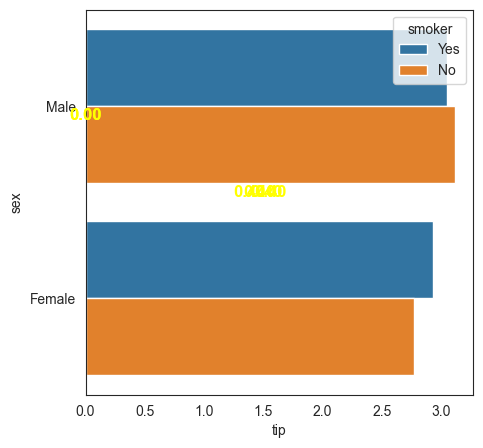

In [23]:
sns.set_style('white')

plt.figure(figsize=(5,5))

ax = sns.barplot(
    data=tips,
    x='tip',
    y='sex',
    errorbar=None,
    estimator='mean',
    hue='smoker'
)

# 添加数值

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width()/2.,p.get_height() + 0.05),
        ha='center',va='center',fontsize=12,fontweight='bold',color='yellow'
    )

#
plt.show()

## 1.3 errorbar


参数=

None：不显示

ci：显示置信区间，（‘ci',95)表示95%置信区间

sd：显示标准差

se：显示标准误

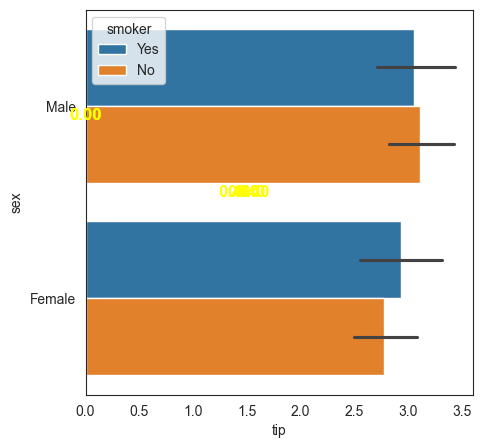

In [24]:
sns.set_style('white')

plt.figure(figsize=(5,5))

ax = sns.barplot(
    data=tips,
    x='tip',
    y='sex',
    errorbar=('ci',95),
    estimator='mean',
    hue='smoker'
)

# 添加数值

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width()/2.,p.get_height() + 0.05),
        ha='center',va='center',fontsize=12,fontweight='bold',color='yellow'
    )

#
plt.show()